In [553]:
import numpy as np
import os, tempfile
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve

from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

import sklearn.metrics as metrics
from scipy import stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%matplotlib inline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [554]:
pd17 = pd.read_csv("./data/2017nfldata.csv")
pd18 = pd.read_csv("./data/2018nfldata.csv")
pd19 = pd.read_csv("./data/2019nfldata.csv")
pd20 = pd.read_csv("./data/2020nfldata.csv")
pd21 = pd.read_csv("./data/2021nfldata.csv")

In [555]:
pd19.head(3)

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank,-9999
0,1,Christian McCaffrey*+,CAR,RB,23,16,16,0,2,0,...,1.0,NaN,355.0,471.2,477.2,413.2,215.0,1,1.0,McCaCh01
1,2,Lamar Jackson*+,BAL,QB,22,15,15,265,401,3127,...,NaN,NaN,416.0,415.7,429.7,421.7,152.0,1,2.0,JackLa00
2,3,Derrick Henry *,TEN,RB,25,15,15,0,0,0,...,NaN,NaN,277.0,294.6,303.6,285.6,136.0,2,3.0,HenrDe00


In [556]:
pd20.head(3)

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank,-9999
0,1,Derrick Henry *+,TEN,RB,26,16,16,0,0,0,...,1.0,NaN,314.0,333.1,341.1,323.6,184.0,1,1.0,HenrDe00
1,2,Alvin Kamara*,NOR,RB,25,15,10,0,0,0,...,NaN,NaN,295.0,377.8,383.8,336.3,165.0,2,2.0,KamaAl00
2,3,Dalvin Cook*,MIN,RB,25,14,14,0,0,0,...,3.0,NaN,294.0,337.8,346.8,315.8,164.0,3,3.0,CookDa01


In [557]:
pd21.head(3)

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank,-9999
0,1,Jonathan Taylor*+,IND,RB,22,17,17,0.0,0.0,0.0,...,NaN,NaN,333.0,373.1,381.1,353.1,187.0,1,1.0,TaylJo02
1,2,Cooper Kupp*+,LAR,WR,28,17,17,0.0,1.0,0.0,...,1.0,NaN,295.0,439.5,442.5,367.0,173.0,1,2.0,KuppCo00
2,3,Deebo Samuel*+,SFO,WR,25,16,15,1.0,2.0,24.0,...,NaN,NaN,262.0,339.0,347.0,300.5,140.0,2,3.0,SamuDe00


In [558]:
for col in pd17.columns:
    print(col)

Rk
Player
Tm
FantPos
Age
G
GS
Cmp
Att
Yds
TD
Int
Att.1
Yds.1
Y/A
TD.1
Tgt
Rec
Yds.2
Y/R
TD.2
Fmb
FL
TD.3
2PM
2PP
FantPt
PPR
DKPt
FDPt
VBD
PosRank
OvRank
-9999


In [559]:
for col in pd18.columns:
    print(col)

Rk
Player
Tm
FantPos
Age
G
GS
Cmp
Att
Yds
TD
Int
Att.1
Yds.1
Y/A
TD.1
Tgt
Rec
Yds.2
Y/R
TD.2
Fmb
FL
TD.3
2PM
2PP
FantPt
PPR
DKPt
FDPt
VBD
PosRank
OvRank
-9999


In [560]:
pd17 = pd17.drop(columns=['Rk', 'Player', 'FantPt', 'DKPt', 'FDPt', 'VBD', 'PosRank', 'OvRank'])
pd18 = pd18.drop(columns=['Rk', 'Player', 'FantPt', 'DKPt', 'FDPt', 'VBD', 'PosRank', 'OvRank'])
pd19 = pd19.drop(columns=['Rk', 'Player', 'FantPt', 'DKPt', 'FDPt', 'VBD', 'PosRank', 'OvRank'])
pd20 = pd20.drop(columns=['Rk', 'Player', 'FantPt', 'DKPt', 'FDPt', 'VBD', 'PosRank', 'OvRank'])
pd21 = pd21.drop(columns=['Rk', 'Player', 'FantPt', 'DKPt', 'FDPt', 'VBD', 'PosRank', 'OvRank'])

In [561]:
pd17.fillna(0, inplace=True)
pd18.fillna(0, inplace=True)
pd19.fillna(0, inplace=True)
pd20.fillna(0, inplace=True)
pd21.fillna(0, inplace=True)


In [562]:
pd17.head()

,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,TD,Int,...,Yds.2,Y/R,TD.2,Fmb,FL,TD.3,2PM,2PP,PPR,-9999
0,LAR,RB,23,15,15,0,0,0,0,0,...,788,12.31,6,5.0,2,19,0.0,0.0,383.3,GurlTo01
1,PIT,RB,25,15,15,0,0,0,0,0,...,655,7.71,2,3.0,2,11,0.0,0.0,341.6,BellLe00
2,KAN,RB,22,16,16,0,0,0,0,0,...,455,8.58,3,1.0,1,11,0.0,0.0,295.2,HuntKa00
3,NOR,RB,22,16,3,0,0,0,0,0,...,826,10.20,5,1.0,1,14,1.0,0.0,320.4,KamaAl00
4,LAC,RB,24,16,16,0,0,0,0,0,...,476,8.21,4,1.0,0,12,0.0,0.0,288.1,GordMe00


In [563]:
pd18.head()

,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,TD,Int,...,Yds.2,Y/R,TD.2,Fmb,FL,TD.3,2PM,2PP,PPR,-9999
0,LAR,RB,24,14,14,0,0,0,0,0,...,580,9.83,4,1.0,1,21,3.0,0.0,372.1,GurlTo01
1,NYG,RB,21,16,16,0,0,0,0,0,...,721,7.92,4,0.0,0,15,1.0,0.0,385.8,BarkSa00
2,CAR,RB,22,16,16,1,1,50,1,0,...,867,8.10,6,4.0,1,13,0.0,0.0,385.5,McCaCh01
3,NOR,RB,23,15,13,0,0,0,0,0,...,709,8.75,4,1.0,0,18,3.0,0.0,354.2,KamaAl00
4,KAN,QB,23,16,16,383,580,5097,50,12,...,0,0.00,0,9.0,2,2,1.0,0.0,417.1,MahoPa00


In [564]:
pd17target = pd18[['PPR','-9999']]

In [565]:
pd17target.head()

,PPR,-9999
0,372.1,GurlTo01
1,385.8,BarkSa00
2,385.5,McCaCh01
3,354.2,KamaAl00
4,417.1,MahoPa00


In [566]:
pd18target = pd19[['PPR','-9999']]
pd19target = pd20[['PPR','-9999']]
pd20target = pd21[['PPR','-9999']]


In [567]:
pd17target.rename(columns={'PPR':'PPRtarget'}, inplace=True)

C:\Users\Peter\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [568]:
pd17target.head()

,PPRtarget,-9999
0,372.1,GurlTo01
1,385.8,BarkSa00
2,385.5,McCaCh01
3,354.2,KamaAl00
4,417.1,MahoPa00


In [569]:
pd18target.rename(columns={'PPR':'PPRtarget'}, inplace=True)
pd19target.rename(columns={'PPR':'PPRtarget'}, inplace=True)
pd20target.rename(columns={'PPR':'PPRtarget'}, inplace=True)

C:\Users\Peter\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [570]:
pd18target.head()

,PPRtarget,-9999
0,471.2,McCaCh01
1,415.7,JackLa00
2,294.6,HenrDe00
3,314.8,JoneAa00
4,311.7,ElliEz00


In [571]:
pd17final = pd17.merge(pd17target,how='left', left_on='-9999', right_on='-9999')

In [572]:
pd17final.head()

,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,TD,Int,...,Y/R,TD.2,Fmb,FL,TD.3,2PM,2PP,PPR,-9999,PPRtarget
0,LAR,RB,23,15,15,0,0,0,0,0,...,12.31,6,5.0,2,19,0.0,0.0,383.3,GurlTo01,372.1
1,PIT,RB,25,15,15,0,0,0,0,0,...,7.71,2,3.0,2,11,0.0,0.0,341.6,BellLe00,NaN
2,KAN,RB,22,16,16,0,0,0,0,0,...,8.58,3,1.0,1,11,0.0,0.0,295.2,HuntKa00,230.2
3,NOR,RB,22,16,3,0,0,0,0,0,...,10.20,5,1.0,1,14,1.0,0.0,320.4,KamaAl00,354.2
4,LAC,RB,24,16,16,0,0,0,0,0,...,8.21,4,1.0,0,12,0.0,0.0,288.1,GordMe00,275.5


In [573]:
pd18final = pd18.merge(pd18target,how='left', left_on='-9999', right_on='-9999')
pd19final = pd19.merge(pd19target,how='left', left_on='-9999', right_on='-9999')
pd20final = pd20.merge(pd20target,how='left', left_on='-9999', right_on='-9999')

In [574]:
df_final = pd.DataFrame().append([pd18final,pd19final, pd20final, pd17final])

In [575]:
df_final.head()

,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,TD,Int,...,Y/R,TD.2,Fmb,FL,TD.3,2PM,2PP,PPR,-9999,PPRtarget
0,LAR,RB,24,14,14,0,0,0,0,0,...,9.83,4,1.0,1,21,3.0,0.0,372.1,GurlTo01,219.4
1,NYG,RB,21,16,16,0,0,0,0,0,...,7.92,4,0.0,0,15,1.0,0.0,385.8,BarkSa00,244.1
2,CAR,RB,22,16,16,1,1,50,1,0,...,8.10,6,4.0,1,13,0.0,0.0,385.5,McCaCh01,471.2
3,NOR,RB,23,15,13,0,0,0,0,0,...,8.75,4,1.0,0,18,3.0,0.0,354.2,KamaAl00,248.5
4,KAN,QB,23,16,16,383,580,5097,50,12,...,0.00,0,9.0,2,2,1.0,0.0,417.1,MahoPa00,287.0


In [576]:
df_final = df_final.sort_values('PPR', ascending=False)

In [577]:
df_final.head(20)

,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,TD,Int,...,Y/R,TD.2,Fmb,FL,TD.3,2PM,2PP,PPR,-9999,PPRtarget
0,CAR,RB,23,16,16,0,2,0,0,0,...,8.66,4,1.0,0,19,1.0,0.0,471.2,McCaCh01,90.4
4,KAN,QB,23,16,16,383,580,5097,50,12,...,0.00,0,9.0,2,2,1.0,0.0,417.1,MahoPa00,287.0
1,BAL,QB,22,15,15,265,401,3127,36,6,...,0.00,0,9.0,2,7,0.0,0.0,415.7,JackLa00,332.8
6,BUF,QB,24,16,16,396,572,4544,37,10,...,12.00,1,9.0,6,9,0.0,0.0,396.1,AlleJo02,402.6
1,NYG,RB,21,16,16,0,0,0,0,0,...,7.92,4,0.0,0,15,1.0,0.0,385.8,BarkSa00,244.1
2,CAR,RB,22,16,16,1,1,50,1,0,...,8.10,6,4.0,1,13,0.0,0.0,385.5,McCaCh01,471.2
0,LAR,RB,23,15,15,0,0,0,0,0,...,12.31,6,5.0,2,19,0.0,0.0,383.3,GurlTo01,372.1
7,GNB,QB,37,16,16,372,526,4299,48,5,...,-6.00,0,4.0,2,3,0.0,0.0,383.3,RodgAa00,333.3
8,ARI,QB,23,16,16,375,558,3971,26,12,...,0.00,0,9.0,4,11,0.0,0.0,378.7,MurrKy00,300.5
1,NOR,RB,25,15,10,0,0,0,0,0,...,9.11,5,1.0,0,21,0.0,0.0,377.8,KamaAl00,234.7


In [578]:
df_final = df_final[df_final['PPR'] > 0]  

In [579]:
df_final = df_final.dropna(subset = ['PPR'])

In [580]:
df_final = df_final.dropna(subset = ['PPRtarget'])

In [581]:
df_final.shape

(1711, 27)

In [582]:
df_final.head(20)

,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,TD,Int,...,Y/R,TD.2,Fmb,FL,TD.3,2PM,2PP,PPR,-9999,PPRtarget
0,CAR,RB,23,16,16,0,2,0,0,0,...,8.66,4,1.0,0,19,1.0,0.0,471.2,McCaCh01,90.4
4,KAN,QB,23,16,16,383,580,5097,50,12,...,0.00,0,9.0,2,2,1.0,0.0,417.1,MahoPa00,287.0
1,BAL,QB,22,15,15,265,401,3127,36,6,...,0.00,0,9.0,2,7,0.0,0.0,415.7,JackLa00,332.8
6,BUF,QB,24,16,16,396,572,4544,37,10,...,12.00,1,9.0,6,9,0.0,0.0,396.1,AlleJo02,402.6
1,NYG,RB,21,16,16,0,0,0,0,0,...,7.92,4,0.0,0,15,1.0,0.0,385.8,BarkSa00,244.1
2,CAR,RB,22,16,16,1,1,50,1,0,...,8.10,6,4.0,1,13,0.0,0.0,385.5,McCaCh01,471.2
0,LAR,RB,23,15,15,0,0,0,0,0,...,12.31,6,5.0,2,19,0.0,0.0,383.3,GurlTo01,372.1
7,GNB,QB,37,16,16,372,526,4299,48,5,...,-6.00,0,4.0,2,3,0.0,0.0,383.3,RodgAa00,333.3
8,ARI,QB,23,16,16,375,558,3971,26,12,...,0.00,0,9.0,4,11,0.0,0.0,378.7,MurrKy00,300.5
1,NOR,RB,25,15,10,0,0,0,0,0,...,9.11,5,1.0,0,21,0.0,0.0,377.8,KamaAl00,234.7


In [583]:
df_final.fillna(0, inplace=True)

In [584]:
df_final = df_final.drop(columns=['-9999'])

In [585]:
df_final.isna().sum()

Tm           0
FantPos      0
Age          0
G            0
GS           0
Cmp          0
Att          0
Yds          0
TD           0
Int          0
Att.1        0
Yds.1        0
Y/A          0
TD.1         0
Tgt          0
Rec          0
Yds.2        0
Y/R          0
TD.2         0
Fmb          0
FL           0
TD.3         0
2PM          0
2PP          0
PPR          0
PPRtarget    0
dtype: int64

In [586]:
df_final.shape

(1711, 26)

In [587]:
df_final.head(20)

,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,TD,Int,...,Yds.2,Y/R,TD.2,Fmb,FL,TD.3,2PM,2PP,PPR,PPRtarget
0,CAR,RB,23,16,16,0,2,0,0,0,...,1005,8.66,4,1.0,0,19,1.0,0.0,471.2,90.4
4,KAN,QB,23,16,16,383,580,5097,50,12,...,0,0.00,0,9.0,2,2,1.0,0.0,417.1,287.0
1,BAL,QB,22,15,15,265,401,3127,36,6,...,0,0.00,0,9.0,2,7,0.0,0.0,415.7,332.8
6,BUF,QB,24,16,16,396,572,4544,37,10,...,12,12.00,1,9.0,6,9,0.0,0.0,396.1,402.6
1,NYG,RB,21,16,16,0,0,0,0,0,...,721,7.92,4,0.0,0,15,1.0,0.0,385.8,244.1
2,CAR,RB,22,16,16,1,1,50,1,0,...,867,8.10,6,4.0,1,13,0.0,0.0,385.5,471.2
0,LAR,RB,23,15,15,0,0,0,0,0,...,788,12.31,6,5.0,2,19,0.0,0.0,383.3,372.1
7,GNB,QB,37,16,16,372,526,4299,48,5,...,-6,-6.00,0,4.0,2,3,0.0,0.0,383.3,333.3
8,ARI,QB,23,16,16,375,558,3971,26,12,...,0,0.00,0,9.0,4,11,0.0,0.0,378.7,300.5
1,NOR,RB,25,15,10,0,0,0,0,0,...,756,9.11,5,1.0,0,21,0.0,0.0,377.8,234.7


In [588]:
df_final.tail()

,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,TD,Int,...,Yds.2,Y/R,TD.2,Fmb,FL,TD.3,2PM,2PP,PPR,PPRtarget
611,IND,RB,29,2,0,0,0,0,0,0,...,3,3.0,0,1.0,1,0,0.0,0.0,0.3,0.0
592,ATL,WR,29,16,0,0,0,0,0,0,...,12,12.0,0,4.0,1,0,0.0,0.0,0.2,35.9
535,LAR,RB,22,4,0,0,0,0,0,0,...,0,0.0,0,0.0,0,0,0.0,0.0,0.1,1.9
574,OAK,QB,28,2,0,1,3,8,0,0,...,0,0.0,0,1.0,0,0,0.0,0.0,0.1,16.9
580,BAL,QB,24,1,0,0,0,0,0,0,...,0,0.0,0,0.0,0,0,0.0,0.0,0.1,9.3


## Correlation Between Variables in Dataset

In [589]:
trainset = X_train.join(y_train)

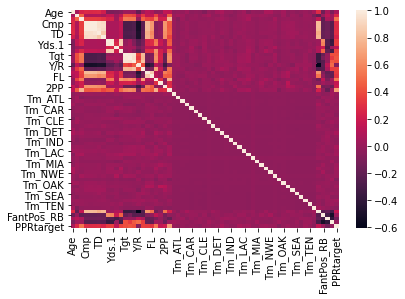

In [590]:
sns.heatmap(trainset.corr());

In [591]:
trainset.corr()

,Age,G,GS,Cmp,Att,Yds,TD,Int,Att.1,Yds.1,...,Tm_SEA,Tm_SFO,Tm_TAM,Tm_TEN,Tm_WAS,FantPos_QB,FantPos_RB,FantPos_TE,FantPos_WR,PPRtarget
Age,1.000000,0.053818,0.241650,0.278406,0.269656,0.274608,0.281941,0.220759,-0.087588,-0.109490,...,-0.032689,-0.015677,0.009840,-0.017033,0.053709,0.278792,-0.152629,0.060483,-0.096440,0.060881
G,0.053818,1.000000,0.471884,0.090024,0.085837,0.092009,0.102098,0.058404,0.160575,0.160373,...,-0.001534,-0.045004,0.023012,0.013280,-0.102443,-0.195439,-0.007587,0.130546,0.030243,0.270416
GS,0.241650,0.471884,1.000000,0.352411,0.350946,0.352814,0.344720,0.318402,0.243923,0.250206,...,-0.002012,-0.009378,0.011907,0.011903,-0.027002,0.159914,-0.213121,0.070159,0.031563,0.525470
Cmp,0.278406,0.090024,0.352411,1.000000,0.998128,0.997070,0.955416,0.927934,0.073258,0.072953,...,0.008521,-0.006576,0.003310,-0.003400,-0.013417,0.796046,-0.187719,-0.151518,-0.236150,0.285661
Att,0.269656,0.085837,0.350946,0.998128,1.000000,0.995258,0.948292,0.938137,0.073878,0.074645,...,0.007533,-0.006132,0.002958,-0.003838,-0.013752,0.803197,-0.189415,-0.152879,-0.238262,0.283671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FantPos_QB,0.278792,-0.195439,0.159914,0.796046,0.803197,0.792806,0.741748,0.777428,0.017123,0.021620,...,-0.021882,0.018934,-0.007493,0.004606,0.040136,1.000000,-0.235596,-0.190088,-0.297063,0.166898
FantPos_RB,-0.152629,-0.007587,-0.213121,-0.187719,-0.189415,-0.187209,-0.175704,-0.183437,0.617949,0.584450,...,0.002661,0.001815,-0.030532,-0.037390,0.014139,-0.235596,1.000000,-0.320860,-0.501428,0.011764
FantPos_TE,0.060483,0.130546,0.070159,-0.151518,-0.152879,-0.151142,-0.142529,-0.148234,-0.255897,-0.247882,...,-0.006723,0.018016,0.016484,0.012323,-0.012940,-0.190088,-0.320860,1.000000,-0.404573,-0.137961
FantPos_WR,-0.096440,0.030243,0.031563,-0.236150,-0.238262,-0.234754,-0.218194,-0.230310,-0.371551,-0.350199,...,0.017840,-0.029370,0.019645,0.021307,-0.029370,-0.297063,-0.501428,-0.404573,1.000000,-0.008751


In [592]:
cr = trainset.corr()
cr = cr[cr < 1]

In [593]:
cr.unstack().sort_values(ascending=False)[:30]

Cmp    Att      0.998128
Att    Cmp      0.998128
Cmp    Yds      0.997070
Yds    Cmp      0.997070
       Att      0.995258
Att    Yds      0.995258
Att.1  Yds.1    0.983804
Yds.1  Att.1    0.983804
Tgt    Rec      0.982722
Rec    Tgt      0.982722
Yds.2  Tgt      0.966029
Tgt    Yds.2    0.966029
TD     Yds      0.963794
Yds    TD       0.963794
Cmp    TD       0.955416
TD     Cmp      0.955416
Yds.2  Rec      0.952893
Rec    Yds.2    0.952893
Att    TD       0.948292
TD     Att      0.948292
Att    Int      0.938137
Int    Att      0.938137
Cmp    Int      0.927934
Int    Cmp      0.927934
Yds    Int      0.925447
Int    Yds      0.925447
TD.1   Yds.1    0.884074
Yds.1  TD.1     0.884074
Att.1  TD.1     0.867993
TD.1   Att.1    0.867993
dtype: float64

In [594]:
## sns.pairplot(trainset.head(10))

## Train Test Split

In [595]:
X = df_final.drop(columns=['PPRtarget'])
y = df_final['PPRtarget']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [596]:
X_train.shape

(1368, 25)

In [597]:
y_train.shape

(1368,)

## Feature engineering

In order to analyze our categorical vaiables, we will convert the team each player was on, and the position that they play with one hot encoding

In [598]:
categoricals = ['Tm', 'FantPos']
X_train_dummies = pd.get_dummies(X_train[categoricals], prefix=categoricals)
X_train_dummies

,Tm_2TM,Tm_3TM,Tm_ARI,Tm_ATL,Tm_BAL,Tm_BUF,Tm_CAR,Tm_CHI,Tm_CIN,Tm_CLE,...,Tm_PIT,Tm_SEA,Tm_SFO,Tm_TAM,Tm_TEN,Tm_WAS,FantPos_QB,FantPos_RB,FantPos_TE,FantPos_WR
110,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
99,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
255,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
383,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
192,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
467,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [599]:
categoricals = ['Tm', 'FantPos']
X_test_dummies = pd.get_dummies(X_test[categoricals], prefix=categoricals)
X_test_dummies

,Tm_2TM,Tm_ARI,Tm_ATL,Tm_BAL,Tm_BUF,Tm_CAR,Tm_CHI,Tm_CIN,Tm_CLE,Tm_DAL,...,Tm_PIT,Tm_SEA,Tm_SFO,Tm_TAM,Tm_TEN,Tm_WAS,FantPos_QB,FantPos_RB,FantPos_TE,FantPos_WR
311,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
368,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
439,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
364,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
285,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
40,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
107,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Dropping original categorical values so that we can add dummy columns:

In [600]:
X_train.drop(['Tm', 'FantPos'], axis=1, inplace=True)
X_test.drop(['Tm', 'FantPos'], axis=1, inplace=True)

C:\Users\Peter\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Removing data for data on players that played on multiple teams in one season:

In [601]:
X_train_dummies.drop(['Tm_2TM', 'Tm_3TM'], axis=1, inplace=True)
X_test_dummies.drop(['Tm_2TM'], axis=1, inplace=True)

In [602]:
X_train.shape

(1368, 23)

In [603]:
X_train_dummies.shape

(1368, 37)

Joining our catergorical data to our test/train sets:

In [604]:
X_train = pd.concat([X_train, X_train_dummies], axis="columns")

In [605]:
X_test = pd.concat([X_test, X_test_dummies], axis="columns")

In [606]:
X_train.shape


(1368, 60)

In [607]:
X_train.head(5)

,Age,G,GS,Cmp,Att,Yds,TD,Int,Att.1,Yds.1,...,Tm_PIT,Tm_SEA,Tm_SFO,Tm_TAM,Tm_TEN,Tm_WAS,FantPos_QB,FantPos_RB,FantPos_TE,FantPos_WR
110,30,15,10,0,0,0,0,0,198,680,...,0,0,0,0,0,0,0,1,0,0
246,29,16,11,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
294,23,12,0,0,0,0,0,0,36,191,...,0,0,0,0,0,0,0,1,0,0
99,24,16,16,0,0,0,0,0,234,871,...,0,0,0,1,0,0,0,1,0,0
255,27,16,14,0,0,0,0,0,8,30,...,0,0,1,0,0,0,0,1,0,0


Now that we have one hot encoded team and position, lets take a look at doing something similar with age. Since a value of 33 vs a value of 27 is not that different as an absolute value for or model, but it is significant in determining an NFL players age, ie mid career vs close to retirement for most players, I am going to divide up the ages of players into discreete bins. For the purpse of fantasy analysis, I am grouping players by 3 groups. Young players(<25), who are rookies or in their first 2 years of data in the league in most cases and establishing their value still. Mid-career players(25-29) who have established their performance and typically are not showing droppoff yet, and late career players(30+) where each additional year in the league significantly increases the chance they will retire. 

In [608]:
X_test["Age Bins"] = pd.cut(X_test['Age'], 
    [0, 24, 29, 100], 
    labels=['A', 'B', 'C'],
    right=True               
)
X_train["Age Bins"] = pd.cut(X_train['Age'], 
    [0, 24, 29, 100], 
    labels=['A', 'B', 'C'],
    right=True               
)

In [609]:
X_test.head()

,Age,G,GS,Cmp,Att,Yds,TD,Int,Att.1,Yds.1,...,Tm_SEA,Tm_SFO,Tm_TAM,Tm_TEN,Tm_WAS,FantPos_QB,FantPos_RB,FantPos_TE,FantPos_WR,Age Bins
311,24,11,4,1,1,16,0,0,0,0,...,0,1,0,0,0,0,0,0,1,A
368,23,16,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,A
439,25,16,4,0,0,0,0,0,6,24,...,0,0,0,0,0,0,1,0,0,B
24,24,16,14,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,A
364,31,15,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,C


Now that we can see that we have a dataframe that mirrors X_test but with A,B,C representing ages, lets remove the original "Age" column, and then one hot encode the age categoricals. 

In [610]:
X_test_age_dummies = pd.get_dummies(X_test["Age Bins"], prefix='age')
X_train_age_dummies = pd.get_dummies(X_train["Age Bins"], prefix='age')
X_test_age_dummies

,age_A,age_B,age_C
311,1,0,0
368,1,0,0
439,0,1,0
24,1,0,0
364,0,0,1
...,...,...,...
502,0,1,0
285,0,0,1
40,1,0,0
107,1,0,0


Lets add that to our dataframe. Also can remove one of the age catergories since if a player's A or B catergory encoding is known, by default we know if they are in C or not 

In [611]:
X_test = pd.concat([X_test, X_test_age_dummies], axis="columns")
X_test.drop(['age_A'], axis=1, inplace=True)
X_test.drop(['Age Bins'], axis=1, inplace=True)
X_test.drop(['Age'], axis=1, inplace=True)

X_train = pd.concat([X_train, X_train_age_dummies], axis="columns")
X_train.drop(['age_A'], axis=1, inplace=True)
X_train.drop(['Age Bins'], axis=1, inplace=True)
X_train.drop(['Age'], axis=1, inplace=True)

In [614]:
X_test.head()

,G,GS,Cmp,Att,Yds,TD,Int,Att.1,Yds.1,Y/A,...,Tm_SFO,Tm_TAM,Tm_TEN,Tm_WAS,FantPos_QB,FantPos_RB,FantPos_TE,FantPos_WR,age_B,age_C
311,11,4,1,1,16,0,0,0,0,0.0,...,1,0,0,0,0,0,0,1,0,0
368,16,0,0,0,0,0,0,0,0,0.0,...,0,0,0,0,0,1,0,0,0,0
439,16,4,0,0,0,0,0,6,24,4.0,...,0,0,0,0,0,1,0,0,1,0
24,16,14,0,0,0,0,0,0,0,0.0,...,0,0,0,0,0,0,0,1,0,0
364,15,4,0,0,0,0,0,0,0,0.0,...,0,0,0,0,0,0,1,0,0,1


In [615]:
X_train.head()

,G,GS,Cmp,Att,Yds,TD,Int,Att.1,Yds.1,Y/A,...,Tm_SFO,Tm_TAM,Tm_TEN,Tm_WAS,FantPos_QB,FantPos_RB,FantPos_TE,FantPos_WR,age_B,age_C
110,15,10,0,0,0,0,0,198,680,3.43,...,0,0,0,0,0,1,0,0,0,1
246,16,11,0,0,0,0,0,0,0,0.00,...,0,0,0,0,0,0,1,0,1,0
294,12,0,0,0,0,0,0,36,191,5.31,...,0,0,0,0,0,1,0,0,0,0
99,16,16,0,0,0,0,0,234,871,3.72,...,0,1,0,0,0,1,0,0,0,0
255,16,14,0,0,0,0,0,8,30,3.75,...,1,0,0,0,0,1,0,0,1,0


## Normalizing Data

In [616]:
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)
y_train.value_counts(normalize=True)

0.0      0.062865
2.2      0.004386
1.8      0.004386
9.2      0.003655
3.1      0.003655
           ...   
10.6     0.000731
143.3    0.000731
72.7     0.000731
380.8    0.000731
116.5    0.000731
Name: PPRtarget, Length: 923, dtype: float64

## Dummy Model

In [617]:
dummy = DummyRegressor(strategy='mean')

In [618]:
dummy.fit(X_train_scaled, y_train)

DummyRegressor()

In [619]:
print(dummy.predict(y)[:10])

[89.23559942 89.23559942 89.23559942 89.23559942 89.23559942 89.23559942
 89.23559942 89.23559942 89.23559942 89.23559942]


Our Dummy model simple predicts the average fantasy point score of 89.2 for each player

## Linear Regression Simple Model

In [315]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [318]:
lr.score(X_train_scaled,y_train)

0.5631877649576615

In [319]:
lr_cv_results = cross_validate(lr, X_train_scaled, y_train, cv=5)

In [320]:
lr_cv_results

{'fit_time': array([0.00299048, 0.00155091, 0.00199485, 0.00319743, 0.00200629]),
 'score_time': array([0.        , 0.00096583, 0.00099659, 0.0009973 , 0.00098467]),
 'test_score': array([0.42349416, 0.59116358, 0.50466182, 0.46123379, 0.52875667])}

In [321]:
lr_test_scores = lr_cv_results['test_score']

In [322]:
lr_score = lr_test_scores.mean()
lr_score

0.5018620037615923

## Decision Tree Regressor

In [330]:
dt = DecisionTreeRegressor() 

dt.fit(X_train_scaled,y_train)

DecisionTreeRegressor()

In [331]:
dt.score(X_train_scaled,y_train)

1.0

In [332]:
dt_cv_results = cross_validate(dt, X_train_scaled, y_train, cv=5)

In [333]:
dt_cv_results

{'fit_time': array([0.01349545, 0.01396203, 0.01396251, 0.0119679 , 0.01295662]),
 'score_time': array([0.00099802, 0.        , 0.        , 0.00100589, 0.        ]),
 'test_score': array([-0.2096254 ,  0.25183664,  0.02246299,  0.18375028,  0.16128712])}

In [336]:
dt_test_scores = dt_cv_results['test_score']
dt_score = dt_test_scores.mean()
dt_score

0.08194232364457991

## KNN Regressor

In [337]:
knn = KNeighborsRegressor(n_neighbors=12)
knn.fit(X_train_scaled, y_train)



KNeighborsRegressor(n_neighbors=12)

In [338]:
knn.score(X_test, y_test)


-1.7197714753708886

In [339]:
knn_cv_results = cross_validate(knn, X_train_scaled, y_train, cv=5)
knn_cv_results

{'fit_time': array([0.00899792, 0.00797772, 0.008003  , 0.00797915, 0.00796413]),
 'score_time': array([0.02422881, 0.02194047, 0.02291441, 0.02195549, 0.02196908]),
 'test_score': array([0.31055396, 0.45546302, 0.40119954, 0.33651927, 0.33978812])}

In [340]:
knn_test_scores = knn_cv_results['test_score']
knn_score = knn_test_scores.mean()
knn_score

0.3687047825513075

## Random Forest Regressor

In [341]:
rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_train)
 

RandomForestRegressor()

In [342]:
rf.score(X_train_scaled,y_train)

0.9336860661318385

In [343]:
rf_cv_results = cross_validate(rf, X_train_scaled, y_train, cv=3)
rf_cv_results

{'fit_time': array([0.65018392, 0.66601562, 0.68153262]),
 'score_time': array([0.00997353, 0.01097369, 0.01099157]),
 'test_score': array([0.440608  , 0.55156436, 0.51423466])}

In [344]:
rf_test_scores = rf_cv_results['test_score']
rf_score = rf_test_scores.mean()
rf_score

0.5021356715013824

## Gradient Boost

In [620]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train_scaled, y_train)

GradientBoostingRegressor()

In [621]:
gbr.score(X_train_scaled,y_train)

0.7176379817666825

In [622]:
gbr_cv_results = cross_validate(gbr, X_train_scaled, y_train, cv=3)
gbr_cv_results

{'fit_time': array([0.20995617, 0.20870137, 0.20798564]),
 'score_time': array([0.00099754, 0.00099659, 0.00100207]),
 'test_score': array([0.44187797, 0.55540489, 0.52233775])}

In [623]:
gbr_test_scores = gbr_cv_results['test_score']
gbr_score = gbr_test_scores.mean()
gbr_score

0.5065402022497153

## Choosing Best Model

In [349]:
pd.DataFrame({'Linear Regression':[lr_score],
              'KNN Regression': [knn_score],
              'Random Forest Regressor': [rf_score],
               'Gradient Boost Regressor': [gbr_score]
             })

,Linear Regression,KNN Regression,Random Forest Regressor,Gradient Boost Regressor
0,0.501862,0.368705,0.502136,0.514861


It appears that the linear Regression model is the most accurate with untuned parameters, followed by RF and Gradient Boost. 

## Applying GridSearch

In [1150]:
lr_parameters = {'fit_intercept': [True, False],
                  'normalize'    :[True, False],
                  'n_jobs' : [1,5,10,15,25,50,100],
                
                 }

In [1151]:
grid_lr = GridSearchCV(estimator=lr, param_grid = lr_parameters, cv = 10, n_jobs=-1)

In [1152]:
grid_lr.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'fit_intercept': [True, False],
                         'n_jobs': [1, 5, 10, 15, 25, 50, 100],
                         'normalize': [True, False]})

In [1153]:
print("\n Best parameters:\n",grid_lr.best_params_)
print("\n With a score of:\n",grid_lr.best_score_)


 Best parameters:
 {'fit_intercept': True, 'n_jobs': 1, 'normalize': True}

 With a score of:
 0.5132446873107025


In [350]:
rf_parameters = { "n_estimators" : [100,200,600,1000],
                    "max_features"   : ["auto", "sqrt", "log2"],
                 "min_samples_split" : [15,50,200],
                          "bootstrap": [True, False],
                     "max_depth": [2,5,10]
            }



In [351]:
grid_rf = GridSearchCV(estimator=rf, param_grid = rf_parameters, cv = 10, n_jobs=-1)

In [352]:
grid_rf.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 5, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [15, 50, 200],
                         'n_estimators': [100, 200, 600, 1000]})

In [353]:
print("\n Best parameters:\n",grid_rf.best_params_)
print("\n With a score of:\n",grid_rf.best_score_)


 Best parameters:
 {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_split': 50, 'n_estimators': 200}

 With a score of:
 0.512920978192879


In [624]:
gbr_parameters = {'learning_rate': [0.018,0.02,0.022],
                  'subsample'    : [0.55,0.5,0.45],
                  'n_estimators' : [140,150,160],
                  'max_depth'    : [3,4,5]
                  }

In [625]:
grid_gbr = GridSearchCV(estimator=gbr, param_grid = gbr_parameters, cv = 10, n_jobs=-1)

In [626]:
grid_gbr.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.018, 0.02, 0.022],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [140, 150, 160],
                         'subsample': [0.55, 0.5, 0.45]})

In [1161]:
print("\n Best parameters:\n",grid_gbr.best_params_)
print("\n With a score of:\n",grid_gbr.best_score_)


 Best parameters:
 {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 150, 'subsample': 0.5}

 With a score of:
 0.5195247478383074


In [1162]:
knn_parameters = {
    'n_neighbors': (1,5,7,10,15,23),
    'leaf_size': (5,10,12,20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev')
}

In [1163]:
grid_knn = GridSearchCV(estimator=knn, param_grid = knn_parameters, cv = 10, n_jobs=-1)

In [1164]:
grid_knn.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(n_neighbors=12), n_jobs=-1,
             param_grid={'leaf_size': (5, 10, 12, 20, 40, 1),
                         'metric': ('minkowski', 'chebyshev'),
                         'n_neighbors': (1, 5, 7, 10, 15, 23), 'p': (1, 2),
                         'weights': ('uniform', 'distance')})

In [1165]:
print("\n Best parameters:\n",grid_knn.best_params_)
print("\n With a score of:\n",grid_knn.best_score_)


 Best parameters:
 {'leaf_size': 5, 'metric': 'minkowski', 'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}

 With a score of:
 0.47271016666752647


In [1166]:
pd.DataFrame({'Linear Regression':[grid_lr.best_score_],
              'KNN Regression': [grid_knn.best_score_],
              'Random Forest Regressor': [grid_rf.best_score_],
               'Gradient Boost Regressor': [grid_gbr.best_score_]
             })

,Linear Regression,KNN Regression,Random Forest Regressor,Gradient Boost Regressor
0,0.513245,0.47271,0.513044,0.519525
